# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.023489e+01     7.600185e+00
 * time: 0.0015070438385009766
     1     2.835586e+01     4.111631e+00
 * time: 0.007444858551025391
     2     1.875887e+01     3.945493e+00
 * time: 0.013479948043823242
     3     1.246990e+01     2.918923e+00
 * time: 0.017711877822875977
     4     1.180834e+01     2.865403e+00
 * time: 0.021199941635131836
     5     1.075176e+01     2.071627e+00
 * time: 0.024478912353515625
     6     9.876075e+00     1.349834e+00
 * time: 0.027765989303588867
     7     9.157115e+00     1.087113e+00
 * time: 0.031141996383666992
     8     8.651216e+00     8.804790e-01
 * time: 0.03449606895446777
     9     8.408905e+00     4.200572e-01
 * time: 0.03858590126037598
    10     8.306432e+00     3.048468e-01
 * time: 0.04276704788208008
    11     8.289393e+00     7.325434e-01
 * time: 0.04594707489013672
    12     8.260525e+00     5.085664e-01
 * time: 0.04904794692993164
    13     8.206104e+00     4.379985e-01

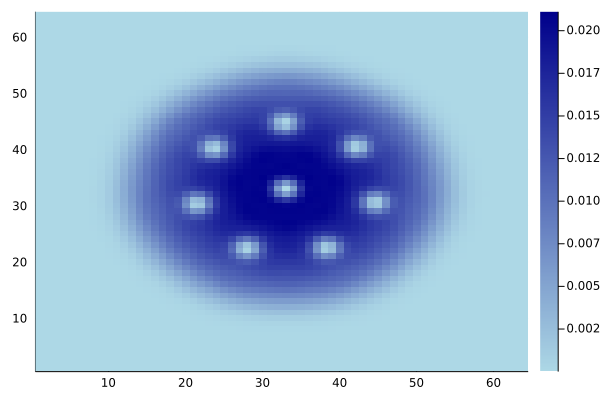

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)